In [2]:
d = rastersstats_to_dict('./example_data/')

In [3]:
pairs = create_pairs(d)

15  pairs created


In [4]:
start = timer()
for p in pairs.keys():
    ys = [y for y in pairs[p].keys()]
    im1 = pairs[p][ys[0]]['arr']
    im2 = pairs[p][ys[1]]['arr']
    pairs[p]['results'] = compute_similarity(im1,im2)
end = timer()
print((end-start)/60)

Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.05
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.36
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.67480569899999
Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.41
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.608027176998803
Computing Mean Square Error...
...Complete. Elapsed Time: [s] 0.00
Computing Structural Similarity Index...
...Complete. Elapsed Time: 0.04
Computing Complex Wavelet Structural Similarity Index...
...Complete. Elapsed Time: 2.34
Computing Gradient Magnitude Similarity...
...Complete. Elapsed Time [s]: 11.513268775001052
Computing Mean Square Error...
...C

In [61]:
dfs = results_to_dataframe(pairs)

2

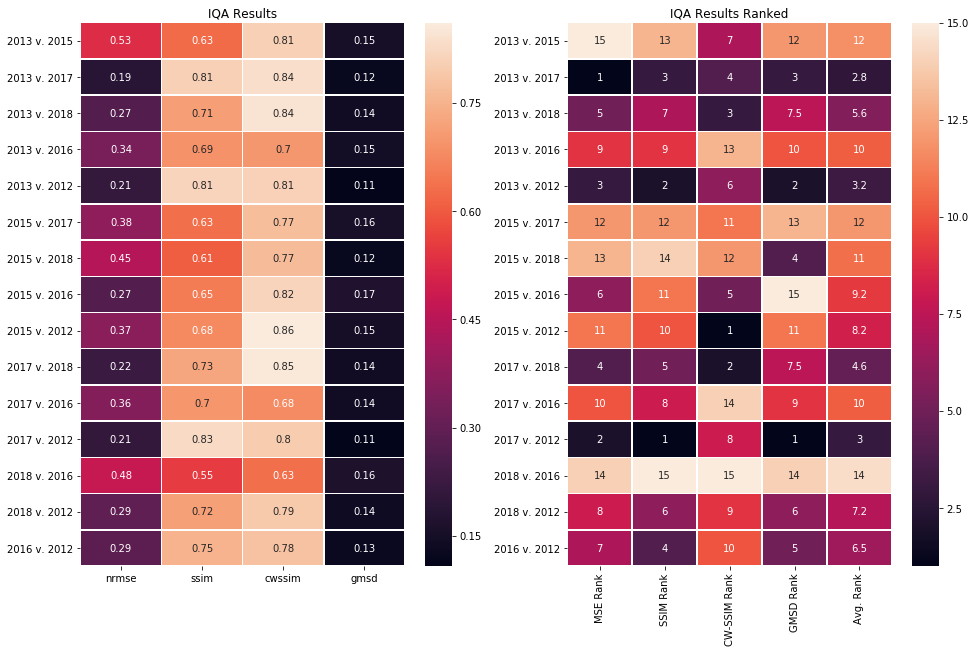

In [89]:
len(dfs)
titles = ['IQA Results', 'IQA Results Ranked']

fig, axes = plt.subplots(figsize=(16,10), nrows=1, ncols=2)
for t, d, ax in zip(titles, dfs, axes):
    p = sns.heatmap(d, annot=True, linewidths=.5, ax=ax)
    p.set_title(t)

[Text(0, 0, '2013 v. 2015'),
 Text(0, 0, '2013 v. 2017'),
 Text(0, 0, '2013 v. 2018'),
 Text(0, 0, '2013 v. 2016'),
 Text(0, 0, '2013 v. 2012'),
 Text(0, 0, '2015 v. 2017'),
 Text(0, 0, '2015 v. 2018'),
 Text(0, 0, '2015 v. 2016'),
 Text(0, 0, '2015 v. 2012'),
 Text(0, 0, '2017 v. 2018'),
 Text(0, 0, '2017 v. 2016'),
 Text(0, 0, '2017 v. 2012'),
 Text(0, 0, '2018 v. 2016'),
 Text(0, 0, '2018 v. 2012'),
 Text(0, 0, '2016 v. 2012')]

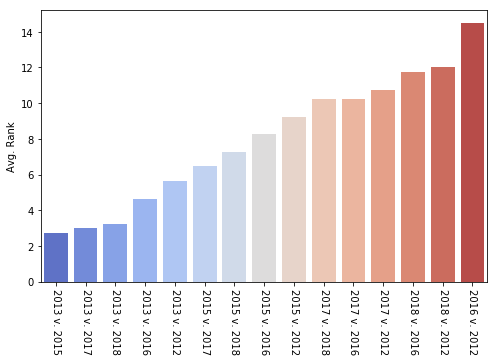

In [87]:
fig, ax = plt.subplots(figsize=(8,5))

p = sns.color_palette('coolwarm', len(dfs[1]))

sns.barplot(x = dfs[1].index,
            y='Avg. Rank',
            data = dfs[1].sort_values('Avg. Rank'),
            ax=ax, palette=p)
ax.set_xticklabels(ax.get_xticklabels(), rotation=270)

In [ ]:
# To plot the metrics, keep here
# for p in pairs.keys():
#     similarity_utils.plot_sim_metrics(pairs[p], p)
#similarity_utils.plot_comparison_inputs_stats(d)
#similarity_utils.plot_comparison_inputs(d)
#similarity_utils.plot_comparison_inputs_hists(d)